In [1]:
import re
# Locations of input files. These files have been anonymized, and the files themselves will not be available
# in this folder, to preserve the privacy of the teams.
textPathFree = "../../../private/brainstorming_viz_data/free_group/"
textPathDC = "../../../private/brainstorming_viz_data/d-c_group/"

# Teamwise transcript (of divergent processes) of the "Free Brainstorming" group
fileNamesFree = ["free_teams_sketch_concepts.txt"]

# Teamwise transcript (of divergent processes) of the "Divergent-Convergent (D-C) Brainstorming" group
fileNamesDC = ["dc_teams_sketch_concepts.txt"]

def openFiles(fileNamesList, filePath):
    # Given a list of file names and a path for the files, returns a
    # list of file objects
    fObjList = []
    for fileName in fileNamesList:
        fObj = open(filePath + fileName, 'r', encoding='utf8')
        fObjList.append(fObj)
    return fObjList

filesListFree = openFiles(fileNamesFree, textPathFree)
filesListDC = openFiles(fileNamesDC, textPathDC)

# Some of these files have non-UTF characters that may need to be removed.
def removeSpecials(filesList):
    # Remove some incompatible unicode characters such as distinct
    # opening and closing quotes, ellipsis etc.
    # Also finally converts all text to lowercase
    outString = ''
    for inFile in filesList:
        # print("reading file",inFile.name.split("/")[-1], "...", end="")
        temp = inFile.read()
        subsFileQuotes = re.sub(u"(\u2018|\u2019)", "'", temp)
        subsFileDQuotes = re.sub(u'(\u201c|\u201d)', '"', subsFileQuotes)
        subsFileEllipsis = re.sub(u"\u2026", "...", subsFileDQuotes)
        outString += subsFileEllipsis
        # print("done.")
    return outString.lower()

group1_raw = removeSpecials(filesListFree)
group2_raw = removeSpecials(filesListDC)

# These files have the transcriber's observations like [laughter], [silent], [cross-talk] etc.
# These may throw off the text analysis, so we remove them. These are typically within parantheses,
# so we can remove everything between these parantheses.

def removeObservations(test_str) :
    # removes all text within parantheses
    # these are usually observations by the transcriber
    # and thus should not be considered in content analysis
    # code from http://stackoverflow.com/questions/14596884/remove-text-between-and-in-python
    ret = ''
    skip1c = 0
    skip2c = 0
    squareparen = 0
    for i in test_str:
        if i == '[':
            skip1c += 1
            squareparen += 1
        elif i == '(':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == ')'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret

group1 = removeObservations(group1_raw)
group2 = removeObservations(group2_raw)

In [11]:
from empath import Empath
lexicon = Empath()
group1_categories = lexicon.analyze(group1, normalize=True)
group2_categories = lexicon.analyze(group2, normalize=True)

group1_catvals = []
group2_catvals = []
group_names = []

combined_weights = {}

for key in group1_categories:
    combined_weights[key] = group1_categories[key] + group2_categories[key]

for ind, w in enumerate(sorted(combined_weights, key=combined_weights.get)):
    if not (group1_categories[w] == 0 and group2_categories[w] == 0):
        group_names.append(w)
        group1_catvals.append(group1_categories[w])
        group2_catvals.append(group2_categories[w])
    
print(len(group_names), "categories identified in text")

145 categories identified in text


Populating the interactive namespace from numpy and matplotlib


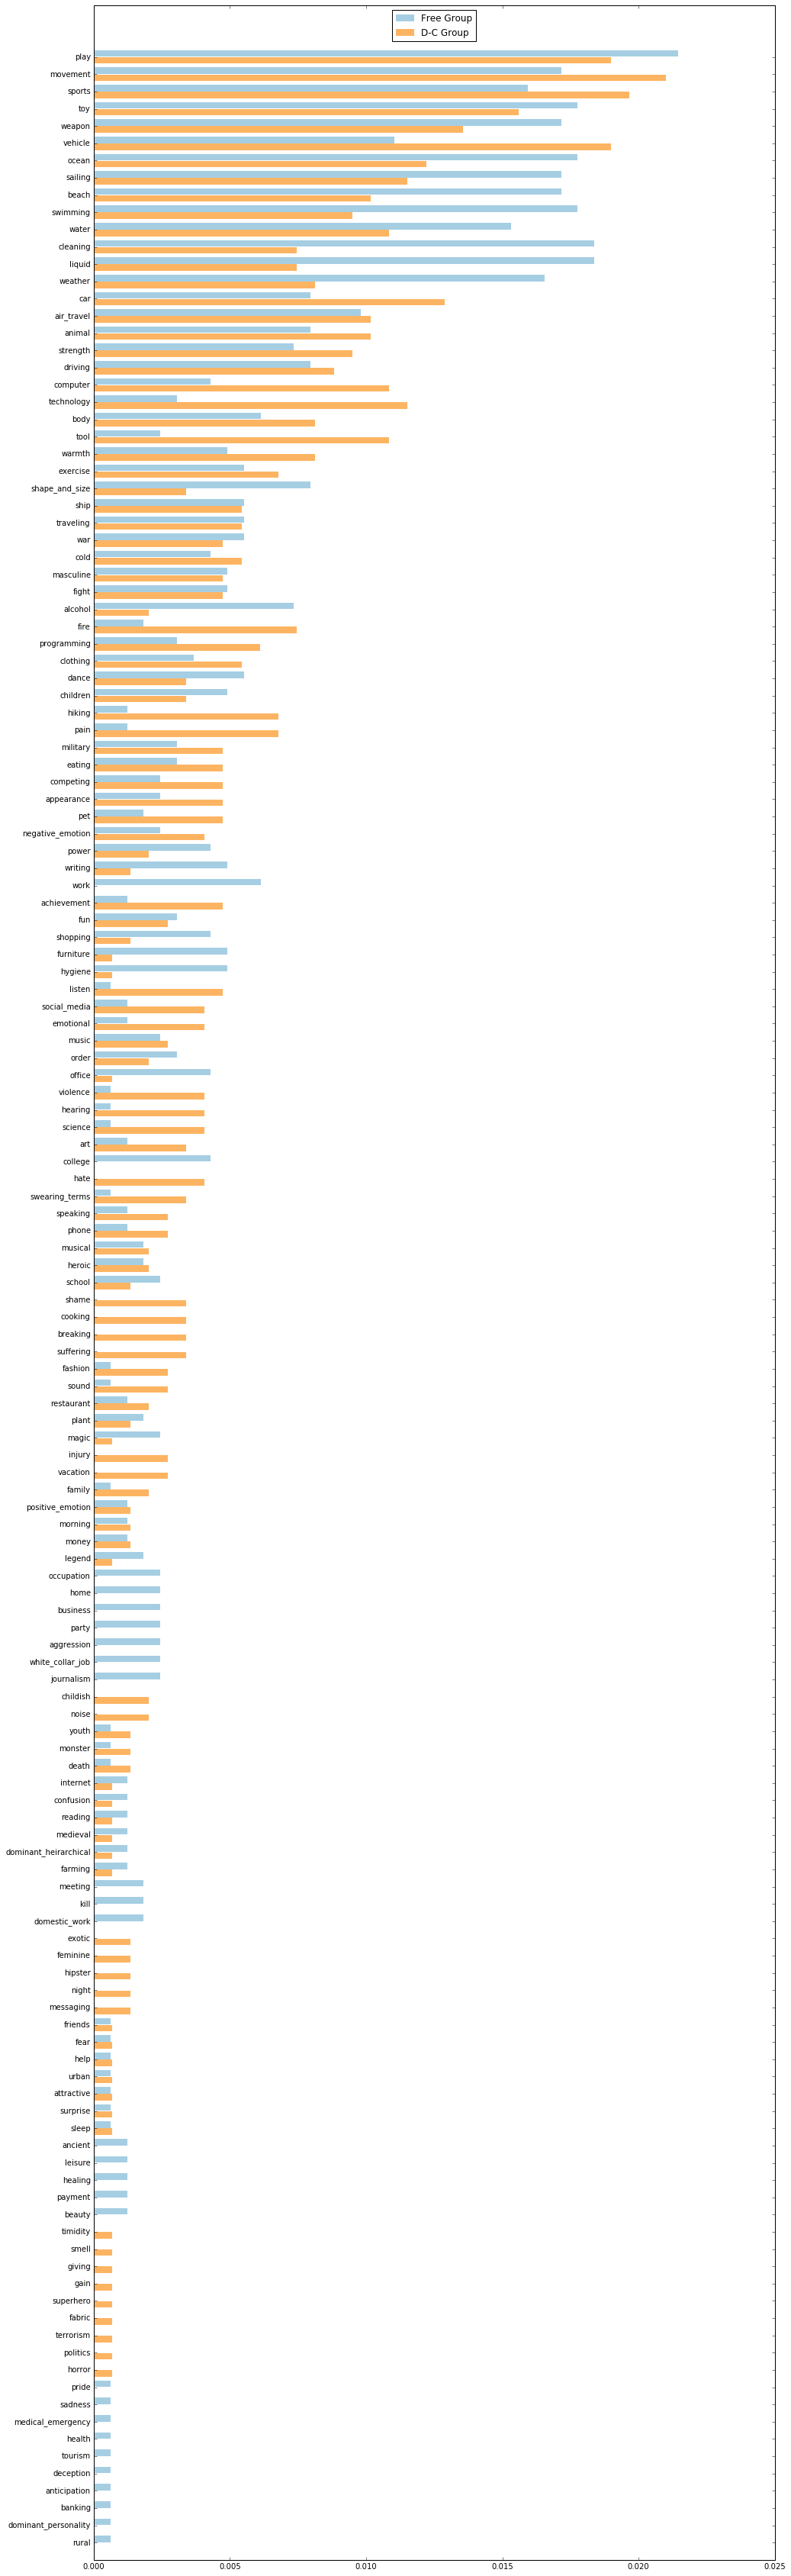

In [19]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 60)
from matplotlib import pyplot as plt
import numpy as np

# group_names = group_names[-30:]
# group1_catvals = group1_catvals[-30:]
# group2_catvals = group2_catvals[-30:]

yTicks = np.arange(len(group_names))
yTicks_grp1 = [x+0.2 for x in yTicks]
yTicks_grp2 = [x-0.2 for x in yTicks]

ax = plt.subplot(111)
ax.barh(yTicks_grp1, group1_catvals, height=0.38, color='#a6cee3', align='center', lw=0)
ax.barh(yTicks_grp2, group2_catvals, height=0.38, color='#fdb462', align='center', lw=0)
ax.set_yticks(yTicks)
ax.set_yticklabels(group_names)
ax.set_ylim([-1, len(group_names) +2])
legend(["Free Group", "D-C Group"], loc=9)

plt.show()